## **Library Importing**
pandas untuk membaca data tabular

numpy untuk perhitungan

seaborn untuk visualisasi

matplotlib untuk visualisasi tabel dll


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as pl

## **Data Importing**

Import data ke Google Colab dengan mengklik folder di sebelah kiri, lalu upload dataset.


In [ ]:
df = pd.read_csv('/content/datasetcoba (1).csv', sep=';')
print("==== 5 Baris Data Teratas ====")
print(df.head())

==== 5 Baris Data Teratas ====
      Gender  Umur     Jurusan/Program Studi  Jam Belajar per Hari  \
0  Laki-laki    20        Teknik Informatika                     6   
1  Perempuan    18                     Hukum                     5   
2  Perempuan    21  Desain Komunikasi Visual                     6   
3  Laki-laki    24                Kedokteran                     3   
4  Laki-laki    18                     Hukum                     4   

   Jam Tidur per Hari          IPK  Jumlah Tugas Besar per Minggu  \
0                   8        03.13                              1   
1                   6  0,188194444                              1   
2                   4  0,127777778                              1   
3                   3        02.44                              0   
4                   4        03.35                              5   

  Frekuensi Olahraga Pemasukan Keluarga Status Hubungan         Label  
0             Jarang             Sedang  Dalam hubungan      

## **EDA**

Exploratory Data Analysis, membersihkan data dan cek apabila adanya outlier

In [ ]:
print("Information")
print(df.info())

Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         3000 non-null   object
 1   Umur                           3000 non-null   int64 
 2   Jurusan/Program Studi          3000 non-null   object
 3   Jam Belajar per Hari           3000 non-null   int64 
 4   Jam Tidur per Hari             3000 non-null   int64 
 5   IPK                            3000 non-null   object
 6   Jumlah Tugas Besar per Minggu  3000 non-null   int64 
 7   Frekuensi Olahraga             3000 non-null   object
 8   Pemasukan Keluarga             3000 non-null   object
 9   Status Hubungan                3000 non-null   object
 10  Label                          3000 non-null   object
dtypes: int64(4), object(7)
memory usage: 257.9+ KB
None


In [ ]:
print("Duplication")
print(df.duplicated().sum())

Duplication
0


In [ ]:
print("Statistics Descriptive")
print(df.describe())

Statistics Descriptive
              Umur  Jam Belajar per Hari  Jam Tidur per Hari  \
count  3000.000000           3000.000000         3000.000000   
mean     21.546667              3.926333            6.028333   
std       2.295702              2.031161            1.983812   
min      18.000000              1.000000            3.000000   
25%      20.000000              2.000000            4.000000   
50%      22.000000              4.000000            6.000000   
75%      24.000000              6.000000            8.000000   
max      25.000000              7.000000            9.000000   

       Jumlah Tugas Besar per Minggu  
count                    3000.000000  
mean                        2.474000  
std                         1.711228  
min                         0.000000  
25%                         1.000000  
50%                         2.000000  
75%                         4.000000  
max                         5.000000  


In [ ]:
print("Missing Value")
print(df.isna().sum())

Missing Value
Gender                           0
Umur                             0
Jurusan/Program Studi            0
Jam Belajar per Hari             0
Jam Tidur per Hari               0
IPK                              0
Jumlah Tugas Besar per Minggu    0
Frekuensi Olahraga               0
Pemasukan Keluarga               0
Status Hubungan                  0
Label                            0
dtype: int64


Outlier Checking


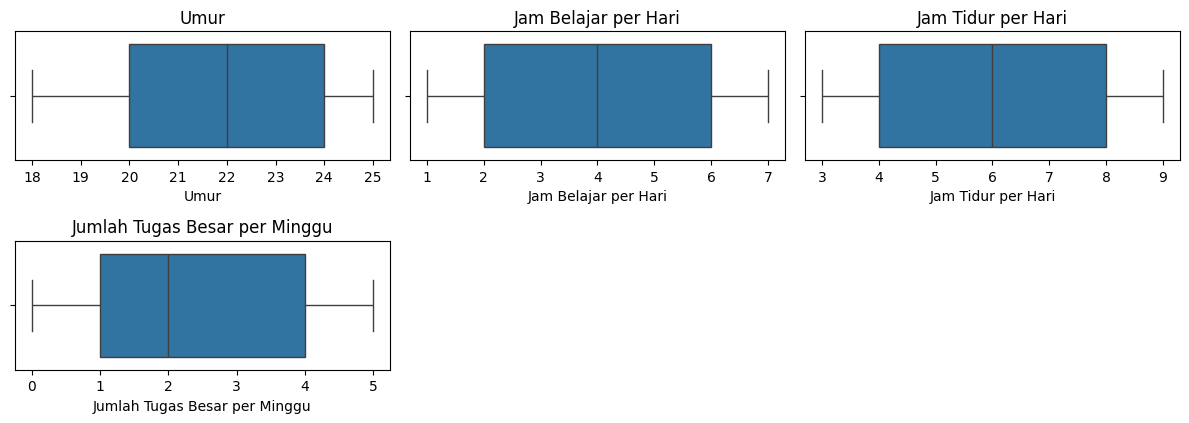

In [ ]:
print("Outlier Checking")
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

## **Data Processing**

In [ ]:
print("Data Normalization")

numeric_features = ['Jam Belajar per Hari', 'Jam Tidur per Hari', 'IPK', 'Jumlah Tugas Besar per Minggu']

print("Before Normalization")
print(df[numeric_features].head())

df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')


df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()

print("After Normalization")
print(df[numeric_features].head())

Data Normalization
Before Normalization
   Jam Belajar per Hari  Jam Tidur per Hari          IPK  \
0                     6                   8        03.13   
1                     5                   6  0,188194444   
2                     6                   4  0,127777778   
3                     3                   3        02.44   
4                     4                   4        03.35   

   Jumlah Tugas Besar per Minggu  
0                              1  
1                              1  
2                              1  
3                              0  
4                              5  
After Normalization
   Jam Belajar per Hari  Jam Tidur per Hari       IPK  \
0              1.020927            0.993878  0.668599   
1              0.528598           -0.014282       NaN   
2              1.020927           -1.022442       NaN   
3             -0.456061           -1.526523 -0.607087   
4              0.036268           -1.022442  1.075339   

   Jumlah Tugas Besar per 

## **Data Split**

In [ ]:
print("Data Splitting")

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training X Train : {X_train.shape[0]}")
print(f"Jumlah data testing X Test : {X_test.shape[0]}")
print(f"Jumlah data training Y Train : {y_train.shape[0]}")
print(f"Jumlah data testing Y Test : {y_test.shape[0]}")

Data Splitting
Jumlah data training X Train : 2400
Jumlah data testing X Test : 600
Jumlah data training Y Train : 2400
Jumlah data testing Y Test : 600


In [ ]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features.remove('Label')



preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

print("Preprocessor 'Preprocessor_clf' has been made")

Preprocessor 'Preprocessor_clf' has been made


## **Random Forest**

Accuracy: 93.5
F1-score: 93.4
Confusion Matrix:
 [[195  35]
 [  4 366]]

Classification Report:
               precision    recall  f1-score   support

Risiko Stres       0.98      0.85      0.91       230
       Sehat       0.91      0.99      0.95       370

    accuracy                           0.94       600
   macro avg       0.95      0.92      0.93       600
weighted avg       0.94      0.94      0.93       600



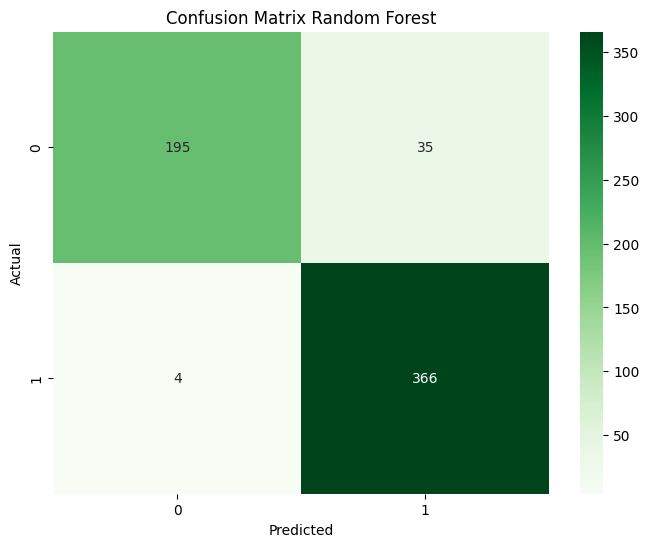

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_clf),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=4,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
rf_pipeline.fit(X_train, y_train)

# Prediksi
y_pred = rf_pipeline.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy*100, 2))
print("F1-score:", round(f1*100, 2))
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()